In [35]:
import geopandas as gpd
from pyproj import CRS
from shapely.geometry import LineString

## Problem 3: How long distance individuals have travelled? (8 points)

In this problem the aim is to calculate the distance in meters that the individuals have travelled according the social media posts (Euclidean distances between points). In this problem, we will need the `userid` -column an the points created in the previous problem. You will need the shapefile `Kruger_posts.shp` generated in Problem 2 as input file.

Our goal is to answer these questions based on the input data:

 - What was the shortest distance travelled in meters?
 - What was the mean distance travelled in meters?
 - What was the maximum distance travelled in meters?

**In your code, you should first:**
 - Import required modules
 - Read in the shapefile as a geodataframe called `data`

In [19]:
data = gpd.read_file('Kruger_posts.shp')

 - Check the crs of the input data. If this information is missing, set it as epsg:4326 (WGS84).
 - Reproject the data from WGS84 to `EPSG:32735` -projection which stands for UTM Zone 35S (UTM zone for South Africa) to transform the data into metric system. (don't create a new variable, update the existing variable `data`!)

In [20]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
data = data.to_crs(epsg=32735)

In [22]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
print(data.head())

         lat        lon         timestamp    userid  \
0 -24.980792  31.484633  2015-07-07 03:02  66487960   
1 -25.499225  31.508906  2015-07-07 03:18  65281761   
2 -24.342578  30.930866  2015-03-07 03:38  90916112   
3 -24.854614  31.519718  2015-10-07 05:04  37959089   
4 -24.921069  31.520836  2015-10-07 05:19  27793716   

                         geometry  
0  POINT (952912.890 7229683.258)  
1  POINT (953433.223 7172080.632)  
2  POINT (898955.144 7302197.408)  
3  POINT (956927.218 7243564.942)  
4  POINT (956794.955 7236187.926)  


In [23]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
# Check that the crs is correct after re-projecting (should be epsg:32735)
print(data.crs)

epsg:32735


 - Group the data by userid

In [24]:
grouped = data.groupby('userid')

In [25]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
assert len(grouped.groups) == data["userid"].nunique(), "Number of groups should match number of unique users!"

**Then:**
- Create an empty GeoDataFrame called `movements`
- Create a for-loop where you iterate over the grouped object. For each user's data: 
    - [sort](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html) the rows by timestamp 
    - create a LineString object based on the user's points
    - add the geometry and the userid into the `movements` dataframe (one userid per row). You can achieve this either by using the `.at` indexer, or the `append` method. See hints for more help.
- Set the CRS of the ``movements`` GeoDataFrame as ``EPSG:32735`` 

In [33]:
group

,lat,lon,timestamp,userid,geometry
4947,-25.479763,30.894174,2015-01-25 16:19,99995791,POINT (891611.590 7176196.099)


In [40]:
movements = gpd.GeoDataFrame(columns=['geometry'])
for key, group in grouped:
    group.sort_values(by='timestamp')
    traj = group['geometry'].values
    if len(traj) >= 2:
        trajectory = LineString(traj)
        movements.at[key, 'geometry'] = trajectory

In [41]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
movements.head()

,geometry
16301,"LINESTRING (939011.113 7254636.121, 942231.630..."
45136,"LINESTRING (905394.500 7193375.148, 905394.500..."
50136,"LINESTRING (963788.403 7228015.063, 944551.607..."
88775,"LINESTRING (902800.817 7192546.975, 902800.839..."
88918,"LINESTRING (959332.961 7219877.715, 963788.403..."


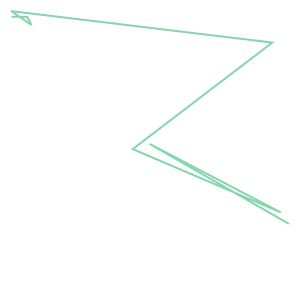

In [73]:
movements.loc[16301, 'geometry']

**Finally:**
- Check once the crs definition of your dataframe (should be epsg:32735, define the correct crs if this information is missing)
- Calculate the lenghts of the lines into a new column called ``distance`` in ``movements`` GeoDataFrame.

In [52]:
movements.crs = CRS.from_epsg(32735).to_wkt()
movements['distance'] = movements['geometry'].length

In [53]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
movements.head()

,geometry,distance
16301,"LINESTRING (939011.113 7254636.121, 942231.630...",195251.395657
45136,"LINESTRING (905394.500 7193375.148, 905394.500...",0.000000
50136,"LINESTRING (963788.403 7228015.063, 944551.607...",254702.529630
88775,"LINESTRING (902800.817 7192546.975, 902800.839...",0.080245
88918,"LINESTRING (959332.961 7219877.715, 963788.403...",9277.252211


You should now be able to print answers to the following questions: 

 - What was the shortest distance travelled in meters?
 - What was the mean distance travelled in meters?
 - What was the maximum distance travelled in meters?

In [63]:
print('Shortest distance travelled in meters: {}'.format(movements['distance'].min()))
print('Mean distance travelled in meters: {}'.format(movements['distance'].mean()))
print('Maximum distance travelled in meters: {}'.format(movements['distance'].max()))

Shortest distance travelled in meters: 0.0
Mean distance travelled in meters: 69090.3822630253
Maximum distance travelled in meters: 4535318.9896208625


- Finally, save the movements of into a Shapefile called ``some_movements.shp``

In [64]:
fp = 'some_movements.shp'
movements.to_file(fp)

In [65]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import os
assert os.path.isfile(fp), "output shapefile does not exits"

That's all for this week!